## Survival Analysis
---

### Survival Analysis의 필요성
* 시간과 치료 여부를 이용해 t-test를 할 수 있으나, 시간/금전적 문제로 인해 현실적으로 어렵다
* 실제 환자를 대상으로 실험 진행시, 모든 환잘르 사망시까지 추적관찰하는 것이 사실상 불가능하다
* 특정 시점에서의 생존 여부(0/1)를 중심으로 분석한 경우, 시간의 흐름을 무시한다는 한계가 있다
<p>

### Survival Analysis의 특징
#### Censoring
* 대상 환자를 실험 종료까지 추적관찰할 수 없는 경우 해당 정보도 고려함
* 불완전한 기록 정보도 통계에 이용할 수 있다
* 생존 정보와 Censoring 정보라는 두 변수를 이용함
> 어떤 event가 일어났는지(사망 혹은 연락두절)를 0/1으로 표현

### Survival Analysis의 검증 방법
#### Log-rank test
* 두 그룹 간에 통계적으로 유의한 차이가 있는지를 검증할 수 있음

#### Cox model
* 다변량 분석이 가능

---

In [1]:
library(survival)

In [2]:
head(veteran)

trt,celltype,time,status,karno,diagtime,age,prior
1,squamous,72,1,60,7,69,0
1,squamous,411,1,70,5,64,10
1,squamous,228,1,60,3,38,0
1,squamous,126,1,60,9,63,10
1,squamous,118,1,70,11,65,10
1,squamous,10,1,20,5,49,0


In [3]:
#survival analysis. treatment 상황에 따라 구분해 fit
#time, sensoring (status) 정보를 함께 사용
km_fit <- survfit(Surv(time, status) ~ trt, data=veteran)
km_fit

Call: survfit(formula = Surv(time, status) ~ trt, data = veteran)

       n events median 0.95LCL 0.95UCL
trt=1 69     64  103.0      59     132
trt=2 68     64   52.5      44      95

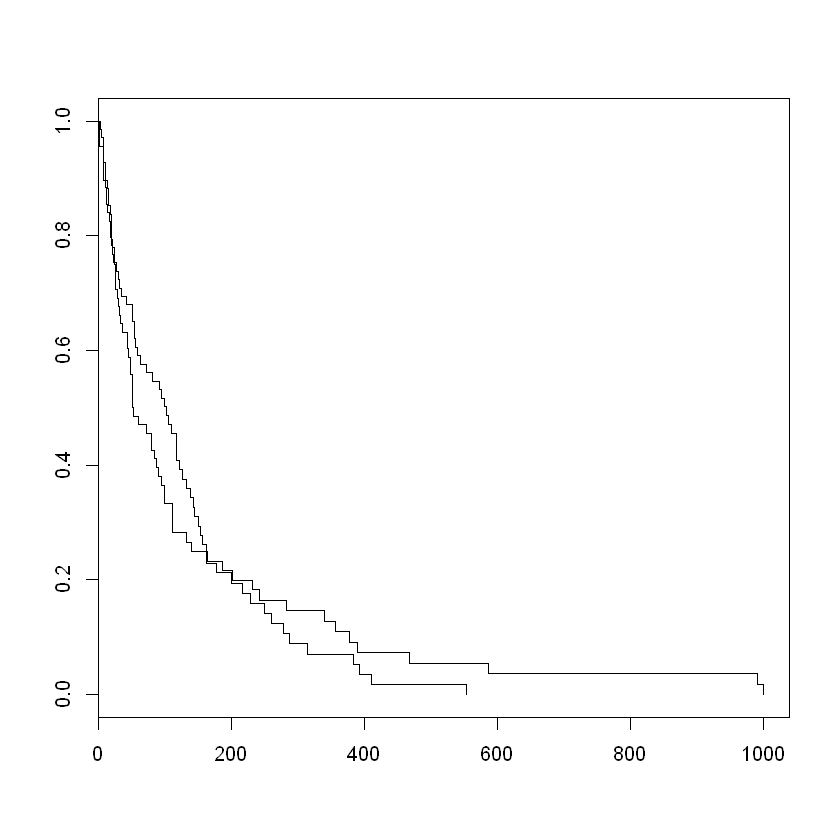

In [4]:
plot(km_fit)

---
### Survival Analysis의 검증
* Log rank test와 cox model을 이용

In [5]:
#log-rank test를 이용해 두 그룹 간 차이를 통계적으로 검증
survdiff(Surv(time, status) ~ trt, data=veteran)

#p-value = 0.9이므로 두 그룹은 통계적으로 유의미한 차이를 보이지 않음

Call:
survdiff(formula = Surv(time, status) ~ trt, data = veteran)

       N Observed Expected (O-E)^2/E (O-E)^2/V
trt=1 69       64     64.5   0.00388   0.00823
trt=2 68       64     63.5   0.00394   0.00823

 Chisq= 0  on 1 degrees of freedom, p= 0.9 

In [6]:
#cox model을 이용해 두 그룹 간 차이를 통계적으로 검증
fit_cox_uni <- coxph(Surv(time, status) ~ trt, data = veteran)
summary(fit_cox_uni)

Call:
coxph(formula = Surv(time, status) ~ trt, data = veteran)

  n= 137, number of events= 128 

       coef exp(coef) se(coef)     z Pr(>|z|)
trt 0.01774   1.01790  0.18066 0.098    0.922

    exp(coef) exp(-coef) lower .95 upper .95
trt     1.018     0.9824    0.7144      1.45

Concordance= 0.525  (se = 0.026 )
Rsquare= 0   (max possible= 0.999 )
Likelihood ratio test= 0.01  on 1 df,   p=0.9
Wald test            = 0.01  on 1 df,   p=0.9
Score (logrank) test = 0.01  on 1 df,   p=0.9


In [9]:
#cox 다변량 분석. 모든 변수 (.)를 고려함
fit_cox_multi <- coxph(Surv(time, status) ~ ., data = veteran)
summary(fit_cox_multi)

Call:
coxph(formula = Surv(time, status) ~ ., data = veteran)

  n= 137, number of events= 128 

                        coef  exp(coef)   se(coef)      z Pr(>|z|)    
trt                2.946e-01  1.343e+00  2.075e-01  1.419  0.15577    
celltypesmallcell  8.616e-01  2.367e+00  2.753e-01  3.130  0.00175 ** 
celltypeadeno      1.196e+00  3.307e+00  3.009e-01  3.975 7.05e-05 ***
celltypelarge      4.013e-01  1.494e+00  2.827e-01  1.420  0.15574    
karno             -3.282e-02  9.677e-01  5.508e-03 -5.958 2.55e-09 ***
diagtime           8.132e-05  1.000e+00  9.136e-03  0.009  0.99290    
age               -8.706e-03  9.913e-01  9.300e-03 -0.936  0.34920    
prior              7.159e-03  1.007e+00  2.323e-02  0.308  0.75794    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

                  exp(coef) exp(-coef) lower .95 upper .95
trt                  1.3426     0.7448    0.8939    2.0166
celltypesmallcell    2.3669     0.4225    1.3799    4.0597
celltypeadeno      